In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

#加载数据，kmeans建模
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans = kmeans.fit(data)
#查看聚类结果中第三类对应哪个数字
m = 3
y_pred = (kmeans.labels_ == m)
counts = np.bincount(labels[y_pred])
n = np.argmax(counts)
print(labels[y_pred])
print(n)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 8 5 5 5 5 5 5 5 5
 5 7 5 5 7 5 7 7 5 5 7 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 1
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9
 5 5 3 5 5 5 5 5 5 3 5]
5


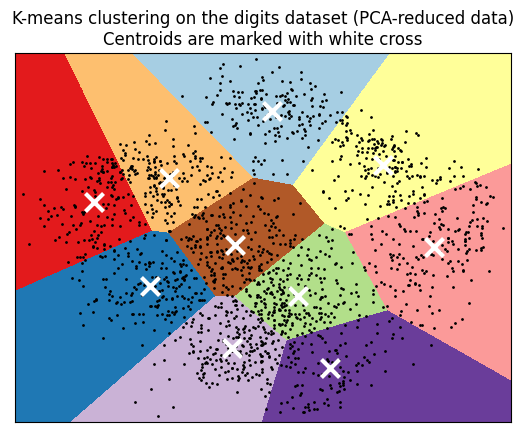

In [2]:
#数据通过PCA降维再聚类
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
#绘制数字的聚类效果
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()